### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda3.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175


#1. Análisis de facturación



In [4]:
import pandas as pd

'''Ingreso total Tienda'''
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

print("=== Ingreso total por tienda ===")
for ingreso,tienda in tiendas.items():
    total = tienda['Precio'].sum()
    print(f"{ingreso}: {total:.2f}")





=== Ingreso total por tienda ===
Tienda 1: 1150880400.00
Tienda 2: 1116343500.00
Tienda 3: 1098019600.00
Tienda 4: 1038375700.00


# 2. Ventas por categoría

In [5]:
'''Cantidad categoria Tienda'''

print("\n=== Ventas por categoría ===")
for categoria, tienda in tiendas.items():
    conteo = tienda['Categoría del Producto'].value_counts()
    categoria_top = conteo.idxmax()
    print(f"{categoria}: Categoría más vendida -> {categoria_top}")
    print(conteo, "\n")



=== Ventas por categoría ===
Tienda 1: Categoría más vendida -> Muebles
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64 

Tienda 2: Categoría más vendida -> Muebles
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64 

Tienda 3: Categoría más vendida -> Muebles
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Art

# 3. Calificación promedio de la tienda


In [20]:
'''Calificacion Tienda'''

print("\n=== Calificación promedio por tienda ===")
for calificacion, tienda in tiendas.items():
    promedio = round(tienda['Calificación'].mean(), 2)
    print(f"{calificacion}: {promedio}")



=== Calificación promedio por tienda ===
Tienda 1: 4.0
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


# 4. Productos más y menos vendidos


=== Tienda 1 ===
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


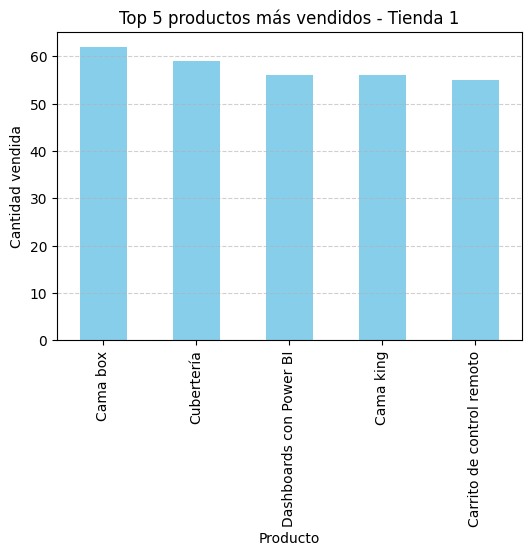


=== Tienda 2 ===
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)


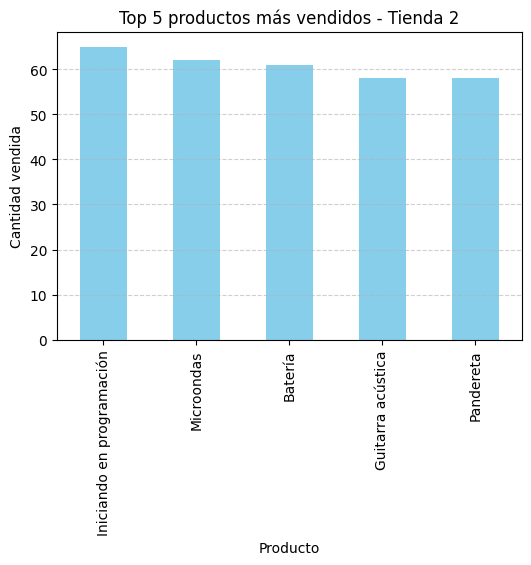


=== Tienda 3 ===
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)


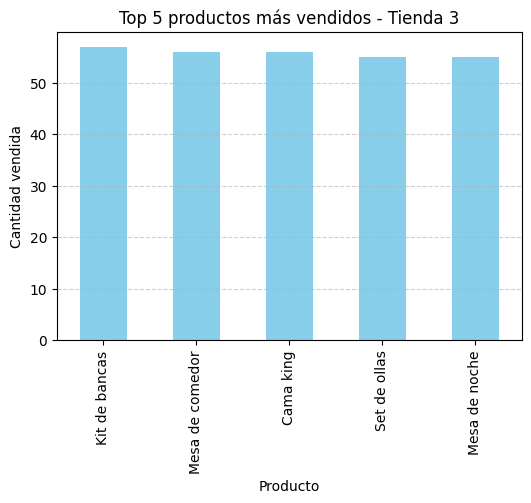


=== Tienda 4 ===
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


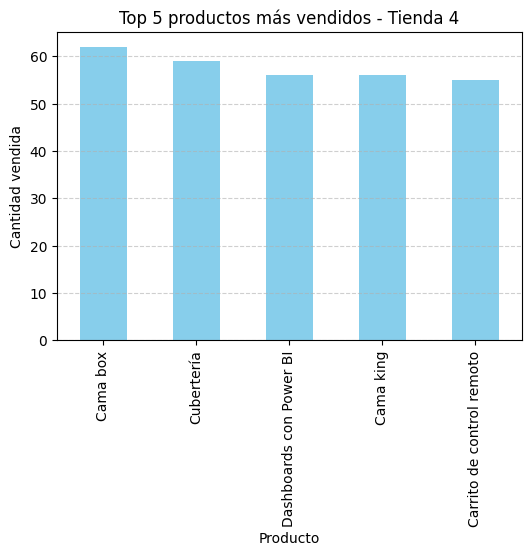

In [10]:
import matplotlib.pyplot as plt

'''Productos más vendidos y menos vendidos'''

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for vendido, tienda in tiendas.items():
    print(f"\n=== {vendido} ===")


    conteo_productos = tienda['Producto'].value_counts()


    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()

    print(f"Producto más vendido: {mas_vendido} ({conteo_productos.max()} ventas)")
    print(f"Producto menos vendido: {menos_vendido} ({conteo_productos.min()} ventas)")


    top5 = conteo_productos.head(5)
    top5.plot(kind='bar', figsize=(6,4), title=f"Top 5 productos más vendidos - {vendido}", color='skyblue')
    plt.xlabel("Producto")
    plt.ylabel("Cantidad vendida")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()


# 5. Envío promedio por tienda

In [11]:
'''Valor del envío promedio por tienda'''

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

print("=== Valor promedio del envío por tienda ===")
for venta, tienda in tiendas.items():
    # Calcula el costo promedio del envío
    promedio_envio = round(tienda['Costo de envío'].mean(), 2)
    print(f"{venta}: ${promedio_envio}")


=== Valor promedio del envío por tienda ===
Tienda 1: $23459.46
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


# 6. GRÁFICO DE BARRAS: Ingreso total por tienda

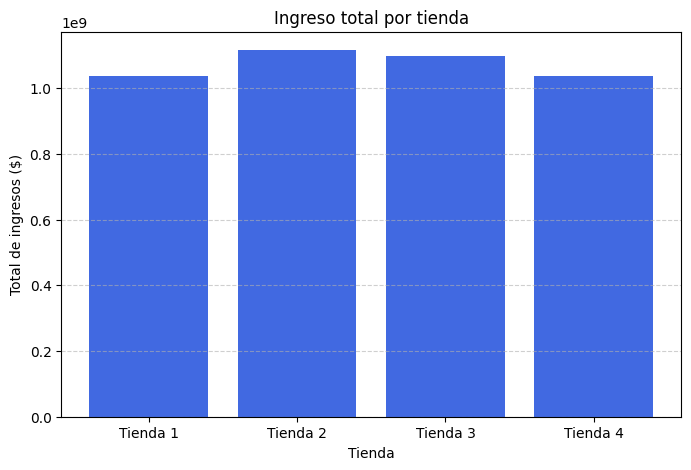

In [12]:
ingresos = {ingreso: tienda['Precio'].sum() for ingreso, tienda in tiendas.items()}

plt.figure(figsize=(8, 5))
plt.bar(ingresos.keys(), ingresos.values(), color='royalblue')
plt.title("Ingreso total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Total de ingresos ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# 7. GRÁFICO CIRCULAR: Distribución de categorías más vendidas

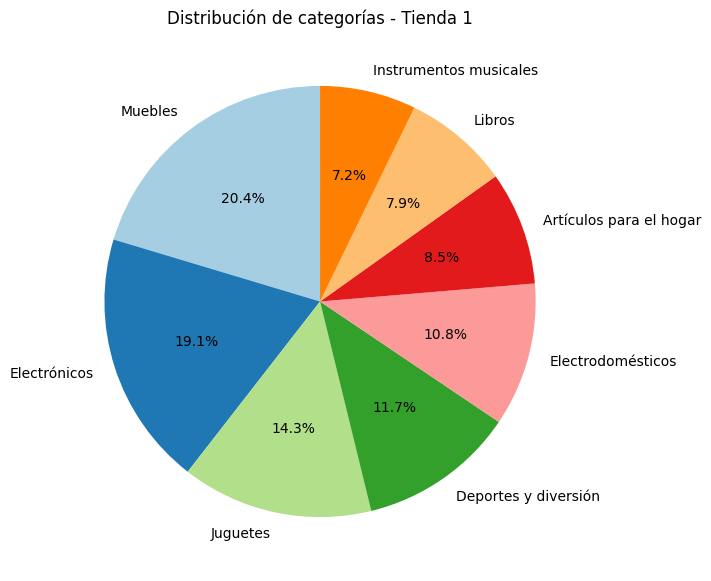

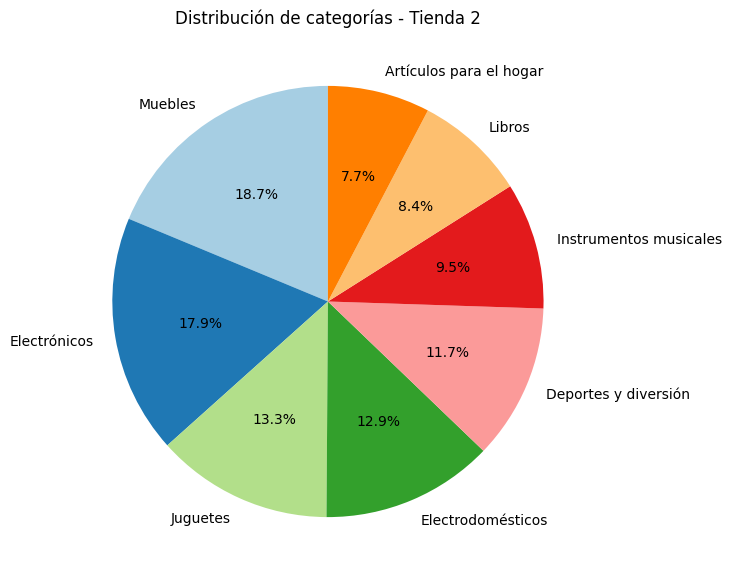

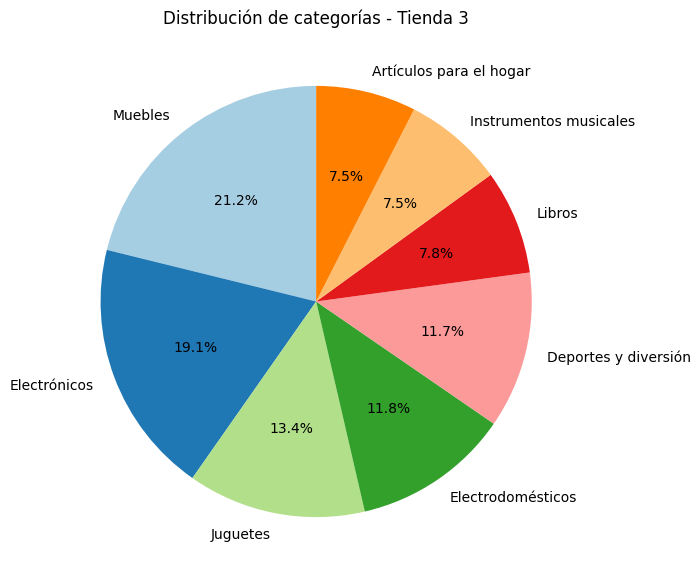

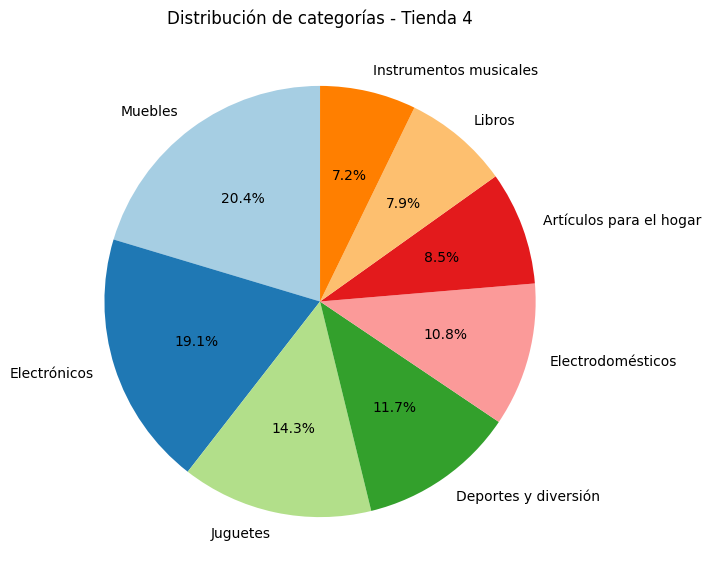

In [13]:

for categoria, tienda in tiendas.items():
    plt.figure(figsize=(7, 7))
    categorias = tienda['Categoría del Producto'].value_counts()
    categorias.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"Distribución de categorías - {categoria}")
    plt.ylabel("")  # quitar etiqueta lateral
    plt.show()



# 8. GRÁFICO DE DISPERSIÓN: Precio vs Calificación

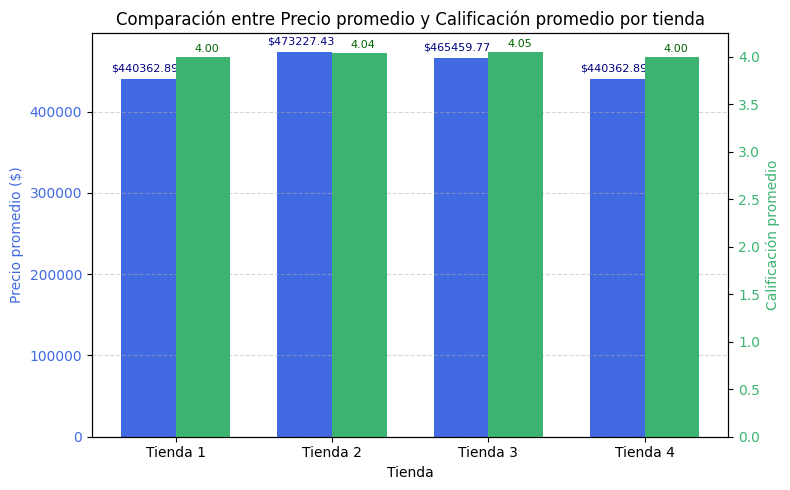

In [16]:
import matplotlib.pyplot as plt
import numpy as np

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}


tiendas_nombres = list(tiendas.keys())
precio_prom = [tienda['Precio'].mean() for tienda in tiendas.values()]
calif_prom = [tienda['Calificación'].mean() for tienda in tiendas.values()]


fig, ax1 = plt.subplots(figsize=(8, 5))

x = np.arange(len(tiendas_nombres))
width = 0.35


barras1 = ax1.bar(x - width/2, precio_prom, width, color='royalblue', label='Precio promedio')
ax1.set_xlabel("Tienda")
ax1.set_ylabel("Precio promedio ($)", color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_xticks(x)
ax1.set_xticklabels(tiendas_nombres)
ax1.grid(axis='y', linestyle='--', alpha=0.5)


ax2 = ax1.twinx()
barras2 = ax2.bar(x + width/2, calif_prom, width, color='mediumseagreen', label='Calificación promedio')
ax2.set_ylabel("Calificación promedio", color='mediumseagreen')
ax2.tick_params(axis='y', labelcolor='mediumseagreen')


plt.title("Comparación entre Precio promedio y Calificación promedio por tienda")


for i, v in enumerate(precio_prom):
    ax1.text(i - 0.2, v + (v * 0.02), f"${v:.2f}", color='navy', ha='center', fontsize=8)
for i, v in enumerate(calif_prom):
    ax2.text(i + 0.2, v + 0.05, f"{v:.2f}", color='darkgreen', ha='center', fontsize=8)


fig.tight_layout()
plt.show()




# 9. GRÁFICO DE DISPERSIÓN: desempeño geográfico

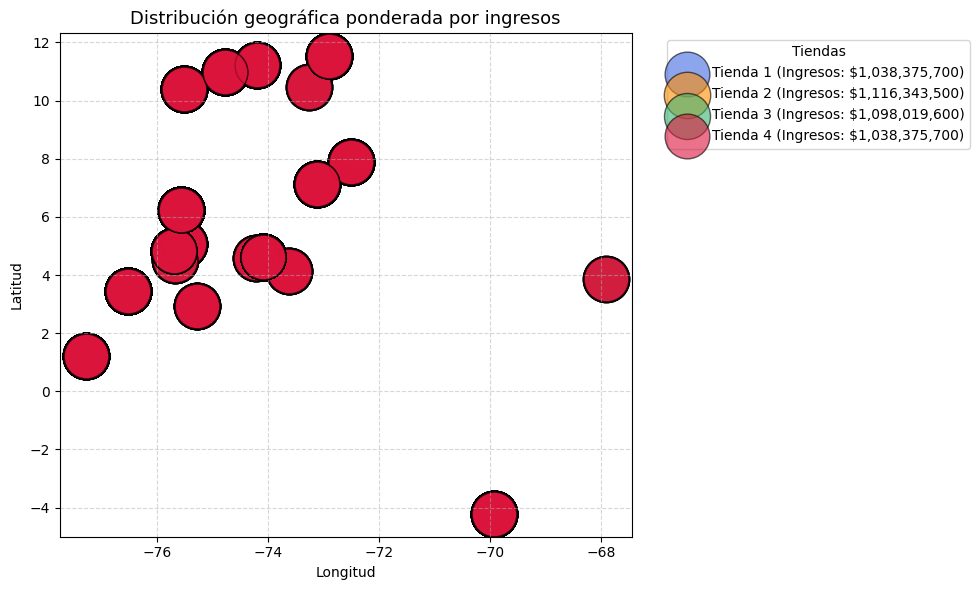

In [19]:
plt.figure(figsize=(10, 6))

ingresos = {nombre: tienda['Precio'].sum() for nombre, tienda in tiendas.items()}
colores = ['royalblue', 'darkorange', 'mediumseagreen', 'crimson']

for (nombre, geografia), color in zip(tiendas.items(), colores):
    plt.scatter(
        geografia['lon'], geografia['lat'],
        s=ingresos[nombre] / 1000000,  # Escala del tamaño
        color=color,
        alpha=0.6,
        label=f"{nombre} (Ingresos: ${ingresos[nombre]:,.0f})",
        edgecolor='black'
    )

plt.title("Distribución geográfica ponderada por ingresos", fontsize=13)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Tiendas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



